In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
sns.set_theme(style='ticks')

xlsx = pd.ExcelFile('Track_Project.xlsx')
df_warholm_s = pd.read_excel(xlsx, sheet_name='W_Splits')
df_benjamin_s = pd.read_excel(xlsx, sheet_name='B_Splits')
df_dossantos_s = pd.read_excel(xlsx, sheet_name='DS_Splits')
df_warholm_c = pd.read_excel(xlsx, sheet_name='W_Cumulative')
df_benjamin_c = pd.read_excel(xlsx, sheet_name='B_Cumulative')
df_dossantos_c = pd.read_excel(xlsx, sheet_name='DS_Cumulative')

In [2]:
df_w_splits = df_warholm_s.copy().assign(Athlete='Warholm')
df_b_splits = df_benjamin_s.copy().assign(Athlete='Benjamin')
df_ds_splits = df_dossantos_s.copy().assign(Athlete='Dos Santos')
df_splits = pd.concat([df_w_splits,df_b_splits,df_ds_splits],axis=0)
df_splits = df_splits.sort_values(by='Time')

In [3]:
all_columns = ['H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','Run in']
start_phase_columns = ['H1','H2','H3','H4']
mid_phase_columns = ['H5','H6','H7']
end_phase_columns = ['H8','H9','H10','Run in']
df_splits['Start_Phase'] = df_splits[start_phase_columns].mean(axis=1)
df_splits['Mid_Phase'] = df_splits[mid_phase_columns].mean(axis=1)
df_splits['End_Phase'] = df_splits[end_phase_columns].mean(axis=1)

In [4]:
q1_start = df_splits['Start_Phase'].quantile(0.25)
q1_mid = df_splits['Mid_Phase'].quantile(0.25)
q1_end = df_splits['End_Phase'].quantile(0.25)

Text(0.55, 4.575, 'End Phase (H8-End)')

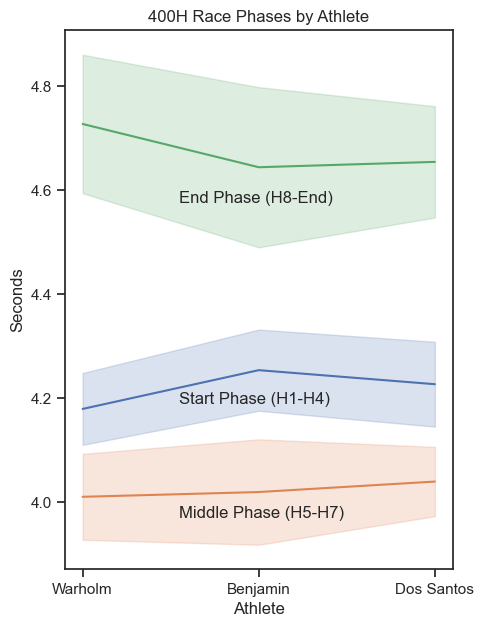

In [11]:
fig, ax = plt.subplots(figsize=([5,7]))
sns.set_theme(style='ticks')
sns.lineplot(data=df_splits,x='Athlete',y='Start_Phase', errorbar='sd')
sns.lineplot(data=df_splits,x='Athlete',y='Mid_Phase', errorbar='sd')
sns.lineplot(data=df_splits,x='Athlete',y='End_Phase', errorbar='sd')
plt.ylabel('Seconds')
plt.title('400H Race Phases by Athlete')
plt.text(0.55,4.19,'Start Phase (H1-H4)', fontsize=12)
plt.text(0.55,3.97,'Middle Phase (H5-H7)', fontsize=12)
plt.text(0.55,4.575,'End Phase (H8-End)', fontsize=12)

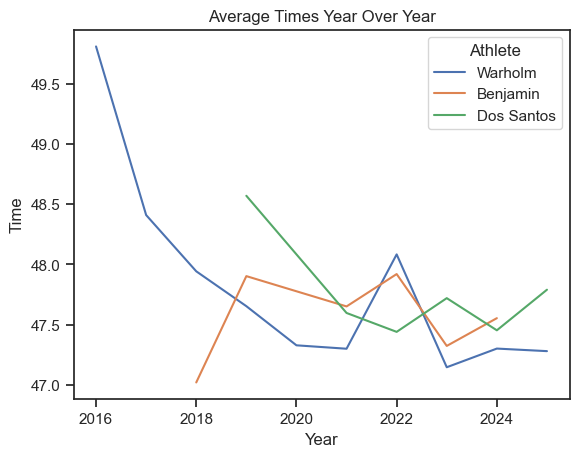

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(data=df_warholm_s,x='Year',y='Time', errorbar=None, ax=ax, label='Warholm')
sns.lineplot(data=df_benjamin_s,x='Year',y='Time', errorbar=None, ax=ax, label='Benjamin')
sns.lineplot(data=df_dossantos_s,x='Year',y='Time', errorbar=None, ax=ax, label='Dos Santos')
plt.title("Average Times Year Over Year")
plt.legend(title='Athlete')

# This graph is practically useless because it only uses step data, go to World Athletics if you want to do a real year over year progression

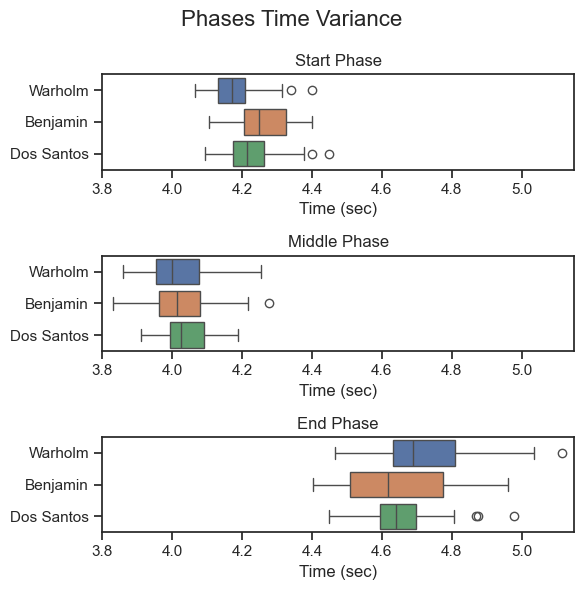

In [ ]:
fig, ax = plt.subplots(3,figsize=(6,6))
sns.boxplot(data=df_splits,x='Start_Phase',y='Athlete',ax=ax[0],hue='Athlete')
ax[0].set_ylabel('')
ax[0].set_xlabel('Time (sec)')
ax[0].set_title('Start Phase')
ax[0].set_xlim(3.8,5.15)
sns.boxplot(data=df_splits,x='Mid_Phase',y='Athlete',ax=ax[1],hue='Athlete')
ax[1].set_ylabel('')
ax[1].set_xlabel('Time (sec)')
ax[1].set_title('Middle Phase')
ax[1].set_xlim(3.8,5.15)
sns.boxplot(data=df_splits,x='End_Phase',y='Athlete',ax=ax[2],hue='Athlete')
ax[2].set_ylabel('')
ax[2].set_xlabel('Time (sec)')
ax[2].set_title('End Phase')
ax[2].set_xlim(3.8,5.15)
fig.suptitle('Phases Time Variance',fontsize=16)
fig.tight_layout()

# Warholm is by far the most explosive starter and also the most consistent, while Benjamin is the slowest
# Very even in middle phase but Dos Santos is most consistent while Warholm is generally the fastest
# Benjamin takes the win in the end, Dos Santos close behind with a few outliers, Warholm closes slowest with one outlier being injury

In [8]:
df_warholm_s_normal = df_w_splits[df_w_splits['Stride Pattern']=='13 to 9 15 to 10']
df_benjamin_s_normal = df_b_splits[df_b_splits['Stride Pattern']=='13 to 10']
df_dossantos_s_normal = df_ds_splits[df_ds_splits['Stride Pattern']=='13 to 2 12 to 6 13 to 10']
df_splits_normal = pd.concat([df_warholm_s_normal,df_benjamin_s_normal,df_dossantos_s_normal],axis=0)

df_warholm_s_off = df_w_splits[df_w_splits['Stride Pattern']!='13 to 9 15 to 10']
df_benjamin_s_off = df_b_splits[df_b_splits['Stride Pattern']!='13 to 10']
df_dossantos_s_off = df_ds_splits[df_ds_splits['Stride Pattern']!='13 to 2 12 to 6 13 to 10']
df_splits_off = pd.concat([df_warholm_s_off,df_benjamin_s_off,df_dossantos_s_off],axis=0)

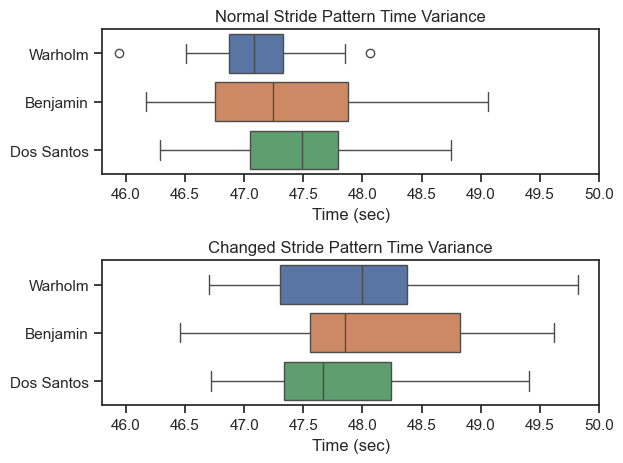

In [ ]:
fig, ax = plt.subplots(2)
sns.boxplot(data=df_splits_normal,x='Time',y='Athlete',ax=ax[0],hue='Athlete')
ax[0].set_ylabel('')
ax[0].set_xlabel('Time (sec)')
ax[0].set_title('Normal Stride Pattern Time Variance')
ax[0].set_xlim(45.8,50)
sns.boxplot(data=df_splits_off,x='Time',y='Athlete',ax=ax[1],hue='Athlete')
ax[1].set_ylabel('')
ax[1].set_xlabel('Time (sec)')
ax[1].set_title('Changed Stride Pattern Time Variance')
ax[1].set_xlim(45.8,50)
fig.tight_layout()

# All athletes do much better with their practiced stride pattern, they also are generally more consistent (ranges are larger with other patterns)
# Not on chart but all athletes had specific patterns earlier in their careers that changed as they got older
# Dos Santos as he experiments the most and can alternate the best does the best when he is changing his pattern, Warholm does the worst
# Should put number of changed pattern or percent to show who alters their pattern the most

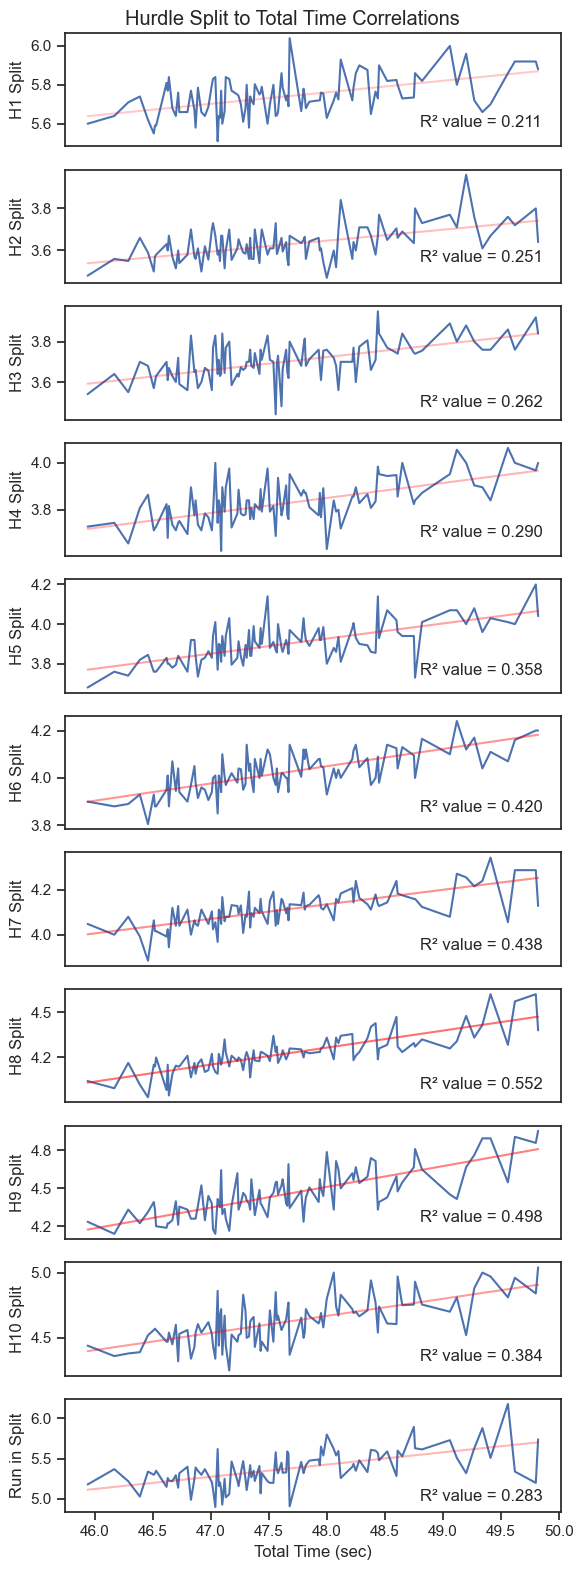

In [87]:
fig, ax = plt.subplots(11,figsize=(6,16))
r_squared_values = {}
for i, column in enumerate(all_columns):
    sns.lineplot(data=df_splits,x='Time',y=column, errorbar=None, ax=ax[i])
    x=df_splits['Time']
    y=df_splits[column]
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    r_squared = r_value**2
    r_squared_values[column] = r_squared
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[i].text(x=48.8,y=min(y)+0.075,s=f'R² value = {r_squared:.3f}')
    ax[i].set_ylabel(f'{column} Split')
    x_range = np.linspace(x.min(), x.max(), 100)
    y_pred = slope * x_range + intercept
    ax[i].plot(x_range, y_pred, color='red', label='Regression',alpha=r_squared)
    if i != len(all_columns)-1:
        ax[i].set_xticks([])
        ax[i].set_xlabel('')
    else:
        ax[i].set_xlabel('Total Time (sec)')
plt.suptitle("Hurdle Split to Total Time Correlations")
fig.tight_layout()
plt.show()

# We can see that Hurdle 8, arguably the most crucial, is the one that most correlates with total time (R squared = 0.552). 
# This shows that Hurdle 8 is likely the best test of the athlete's capabilities and strength.
# Hurdles 6, 7, and 9 (R squared values of 0.42, 0.438, and 0.498) are next correlation wise, showing that the back half of the race determines your time. 
# Hurdles 1 and 2 (R squared values of 0.211 and 0.251) correlate the least so it is not over in the beginning.

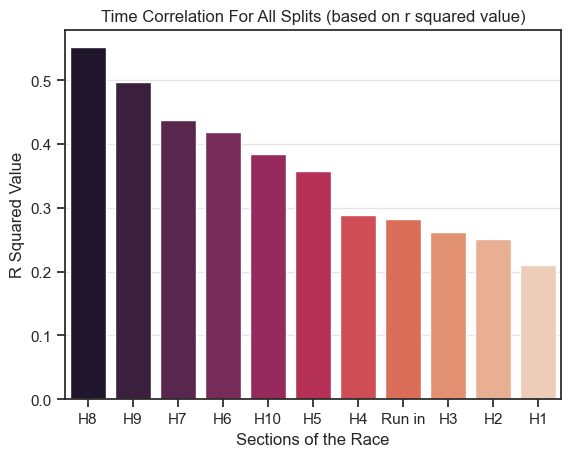

In [84]:
r_squared_sorted = dict(sorted(r_squared_values.items(),key = lambda item: item[1], reverse=True))
sns.barplot(x=list(r_squared_sorted.keys()),y=list(r_squared_sorted.values()),hue=list(r_squared_sorted.keys()),palette='rocket')
plt.xlabel('Sections of the Race')
plt.ylabel('R Squared Value')
plt.title('Time Correlation For All Splits (based on r squared value)')
plt.grid(True, axis='y', alpha=0.5)
plt.show()